In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# loading data
data = pd.read_csv('data/OnlineNewsPopularityCleanRegression.csv')

# 80/20 split between training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(data[["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "n_non_stop_unique_tokens", "num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world", "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg", "kw_max_avg", "kw_avg_avg", "self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess", "weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday", "is_weekend", "LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04", "global_subjectivity", "global_sentiment_polarity", "global_rate_positive_words", "global_rate_negative_words", "rate_positive_words", "rate_negative_words", "avg_positive_polarity", "min_positive_polarity", "max_positive_polarity", "avg_negative_polarity", "min_negative_polarity", "max_negative_polarity", "title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity"]], 
                                                    data['shares'], test_size=0.2, random_state=112)

# different regression models to test
models = [LinearRegression(fit_intercept= False, positive= False, n_jobs=-1),
          Ridge(alpha=0.5, fit_intercept=False, max_iter=1000, positive=False, solver='auto'),
          Lasso(alpha=0.5, fit_intercept=False, max_iter=1000, positive=False, selection='cyclic'),
          DecisionTreeRegressor(criterion='squared_error', max_features=None, splitter='best'),
          RandomForestRegressor(bootstrap=True, criterion='squared_error', max_features=None, oob_score=True, warm_start=True, n_jobs=-1),
          GradientBoostingRegressor(criterion='friedman_mse', loss='squared_error', max_features=None, warm_start=True),
          KNeighborsRegressor(algorithm='auto', weights='uniform', n_jobs=-1)
        ]

model_names = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-NN']

In [3]:
# evaluating each model
model_mse = []
model_mae = []
model_r2 = []
for i in range(len(models)):
    print(f"running {model_names[i]}")
    models[i].fit(X_train, Y_train)
    Y_pred = models[i].predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    model_mse.append(mse)
    model_mae.append(mae)
    model_r2.append(r2)

running Linear Regression
running Ridge
running Lasso


c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.39433e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.207e+12, tolerance: 4.885e+08
  model = cd_fast.enet_coordinate_descent(


running Decision Tree
running Random Forest
running Gradient Boosting
running K-NN


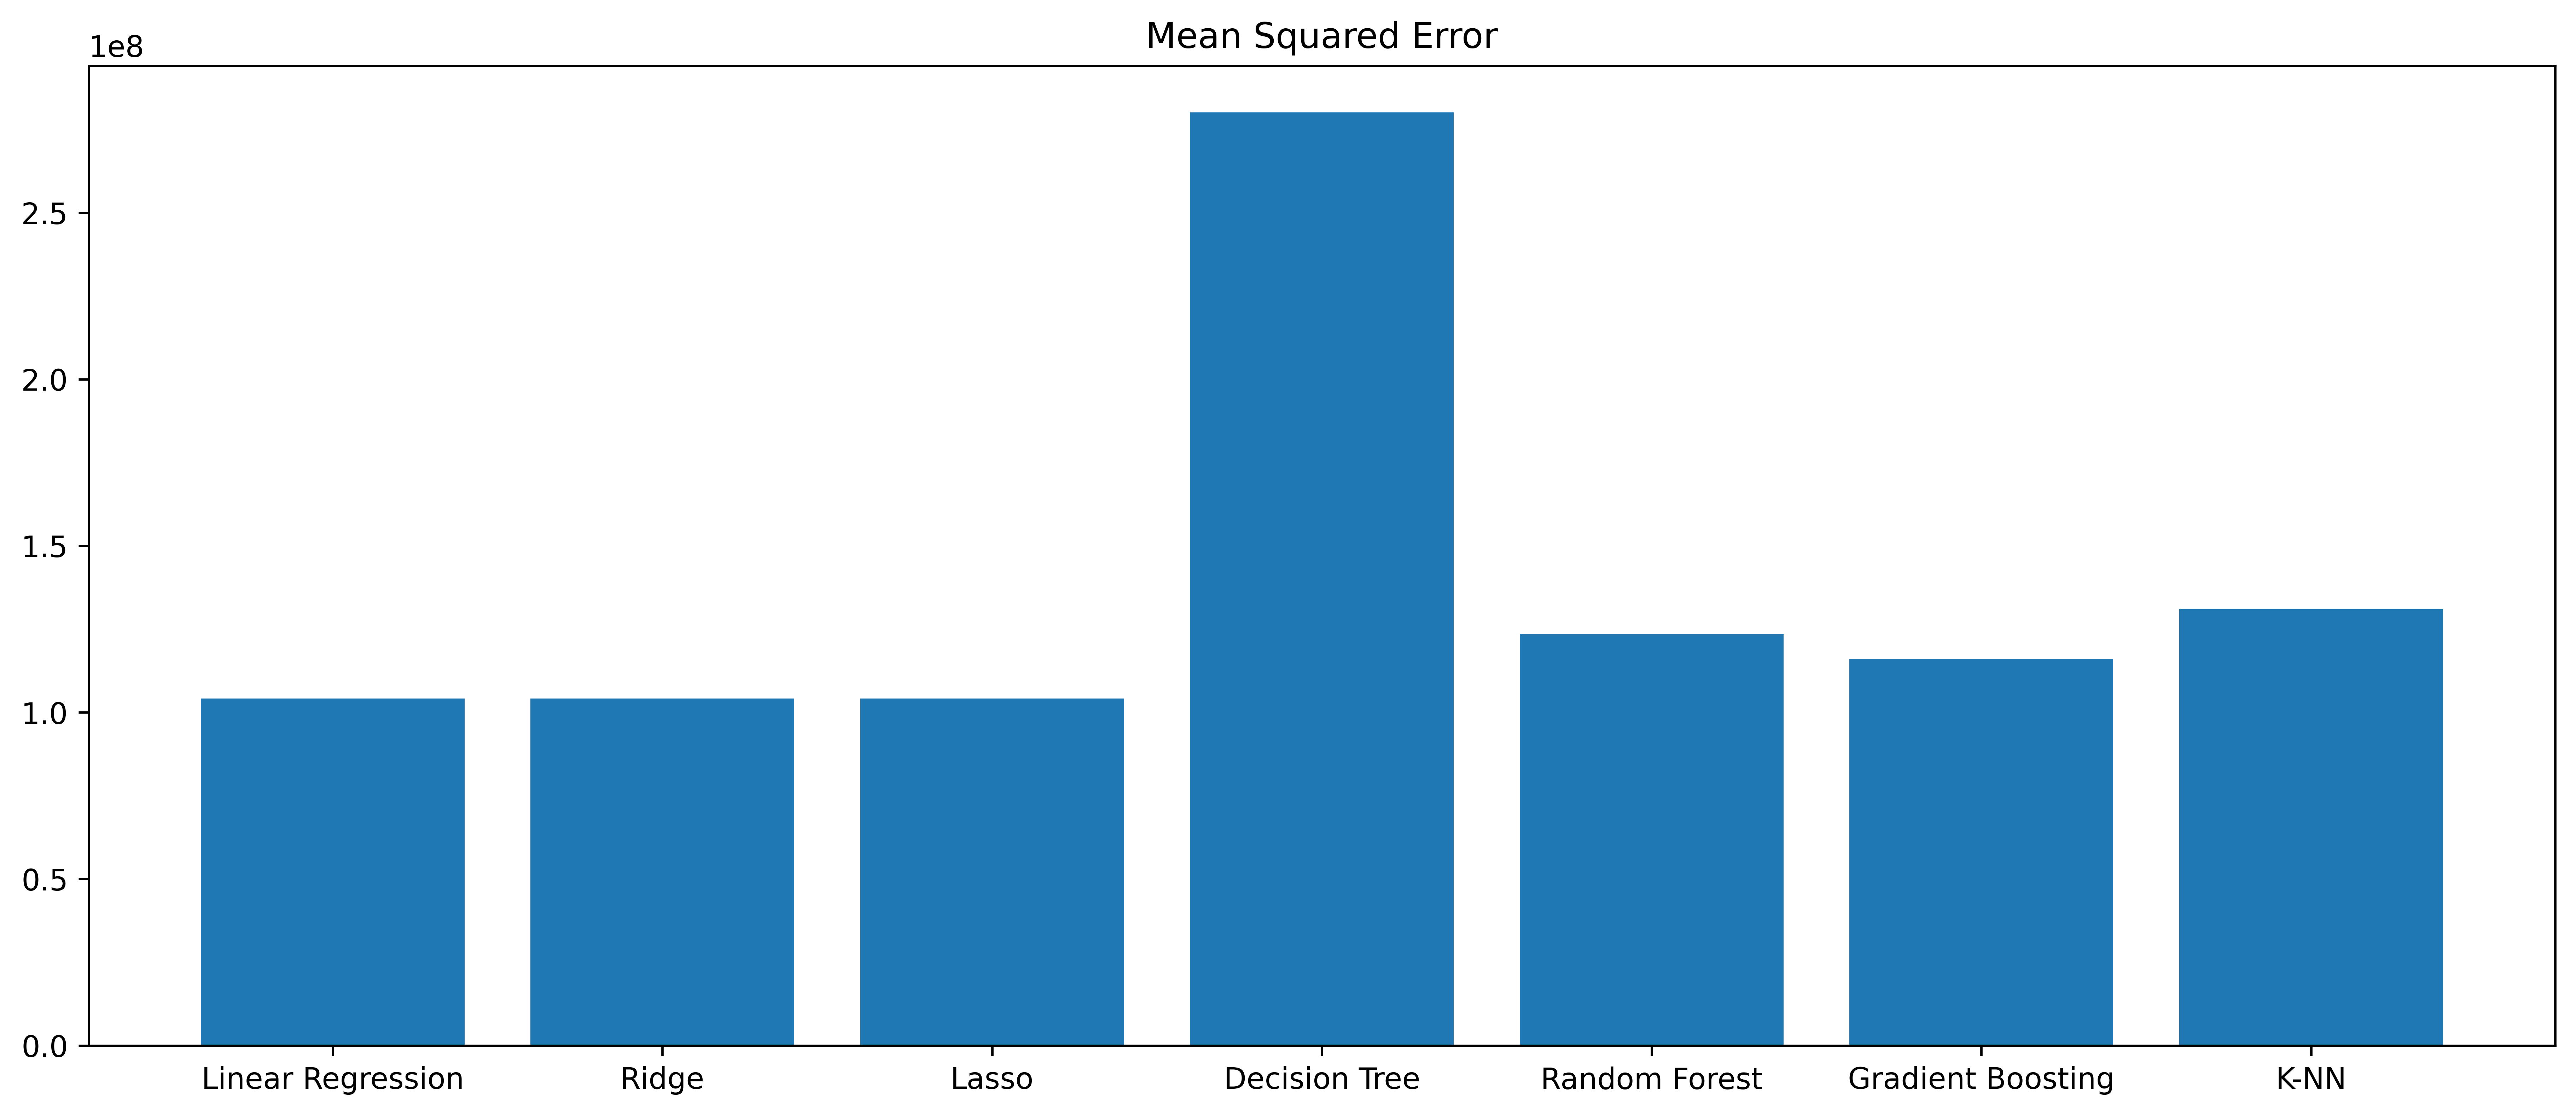

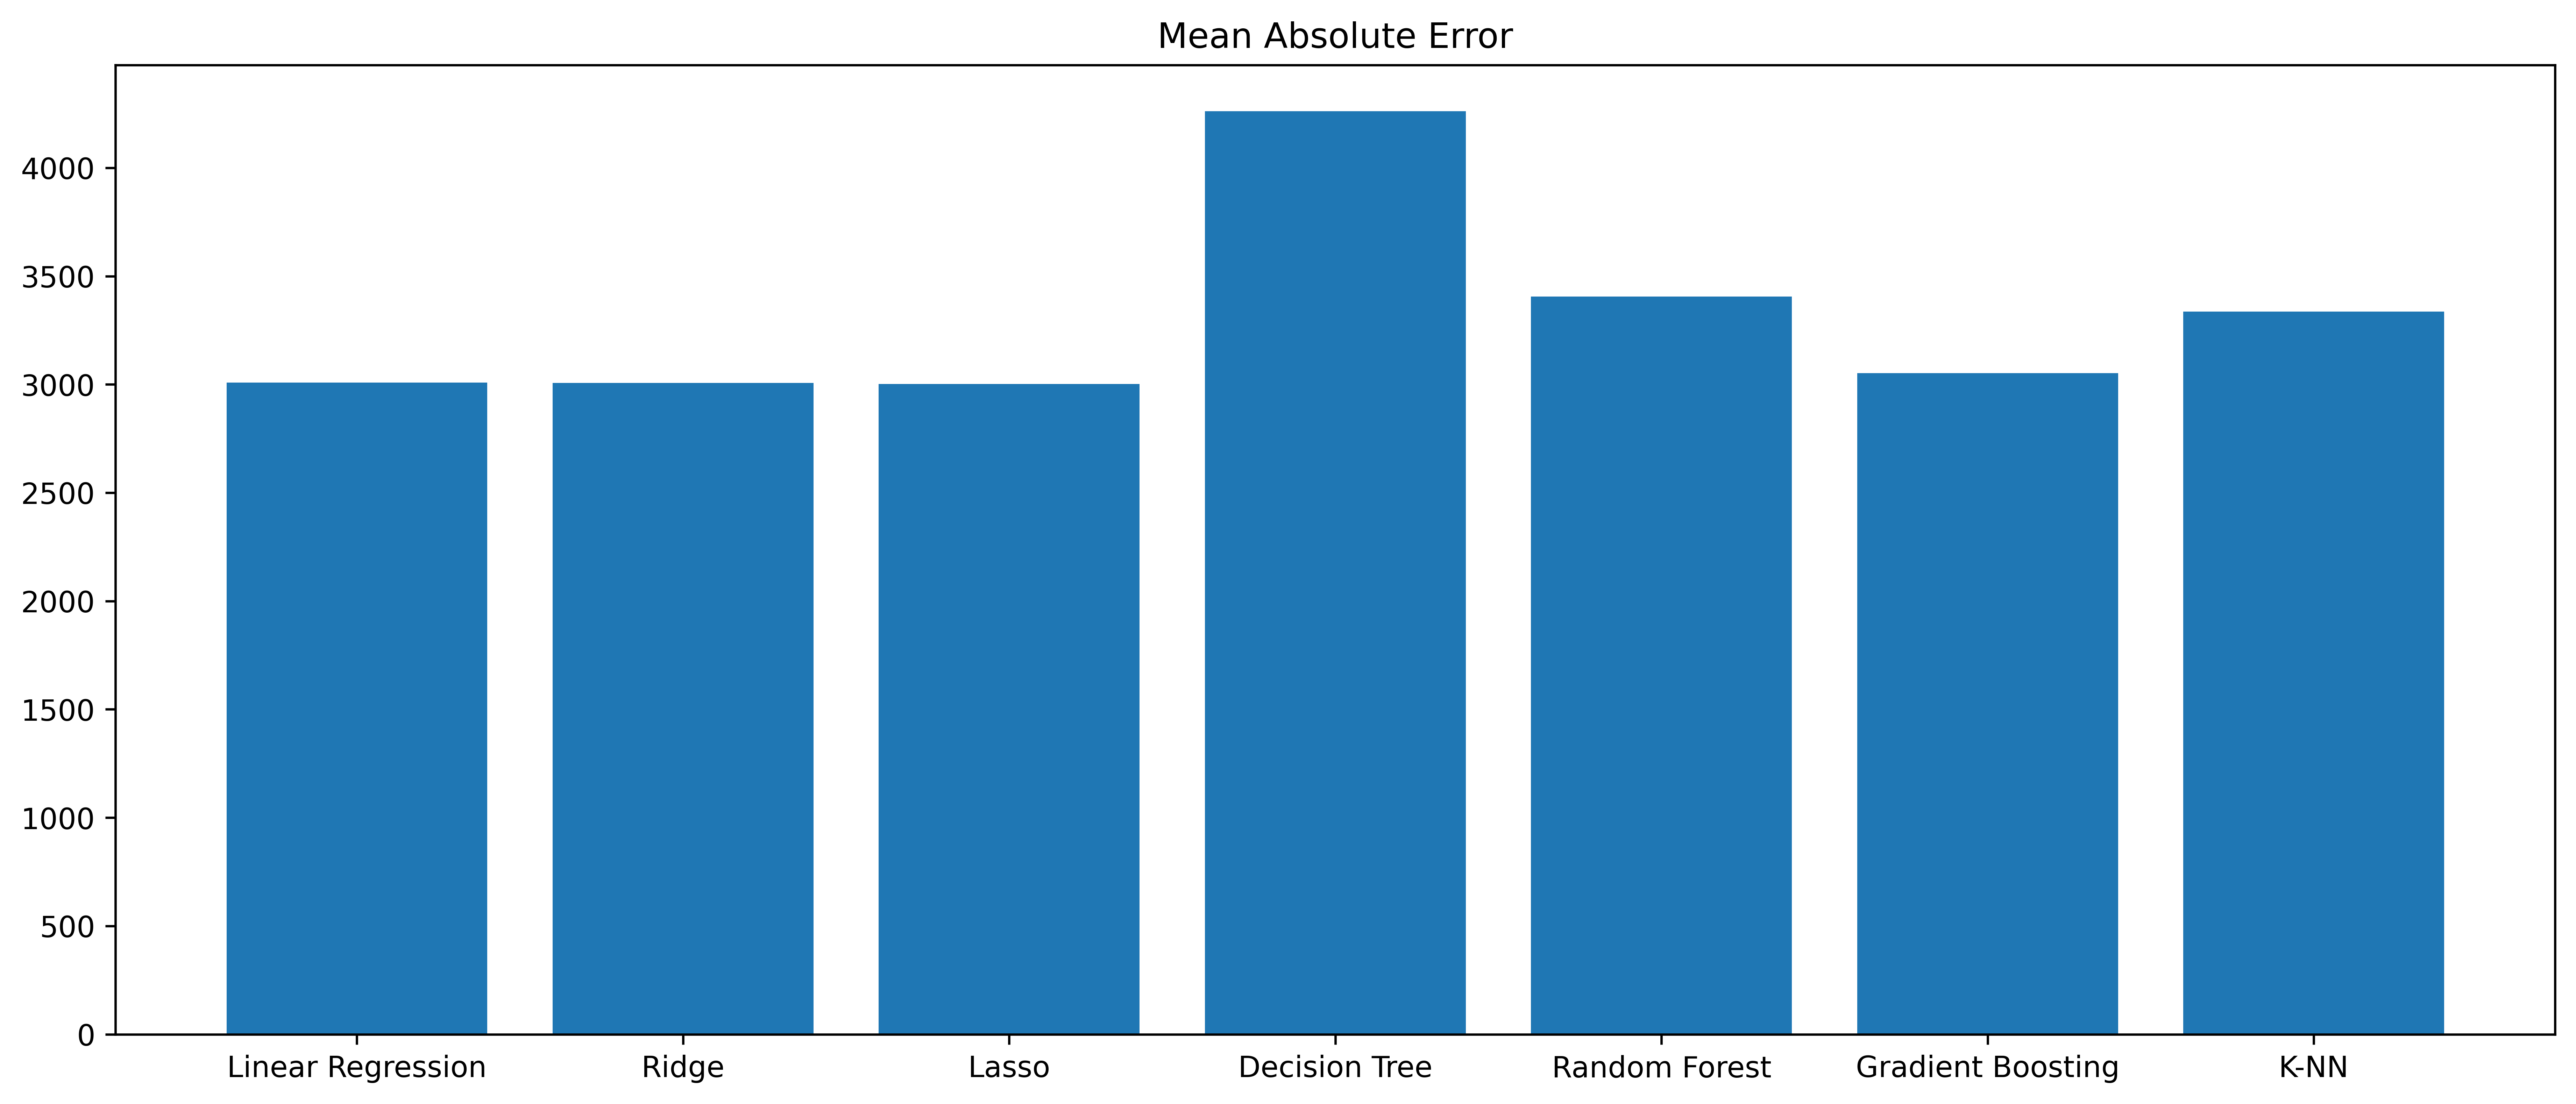

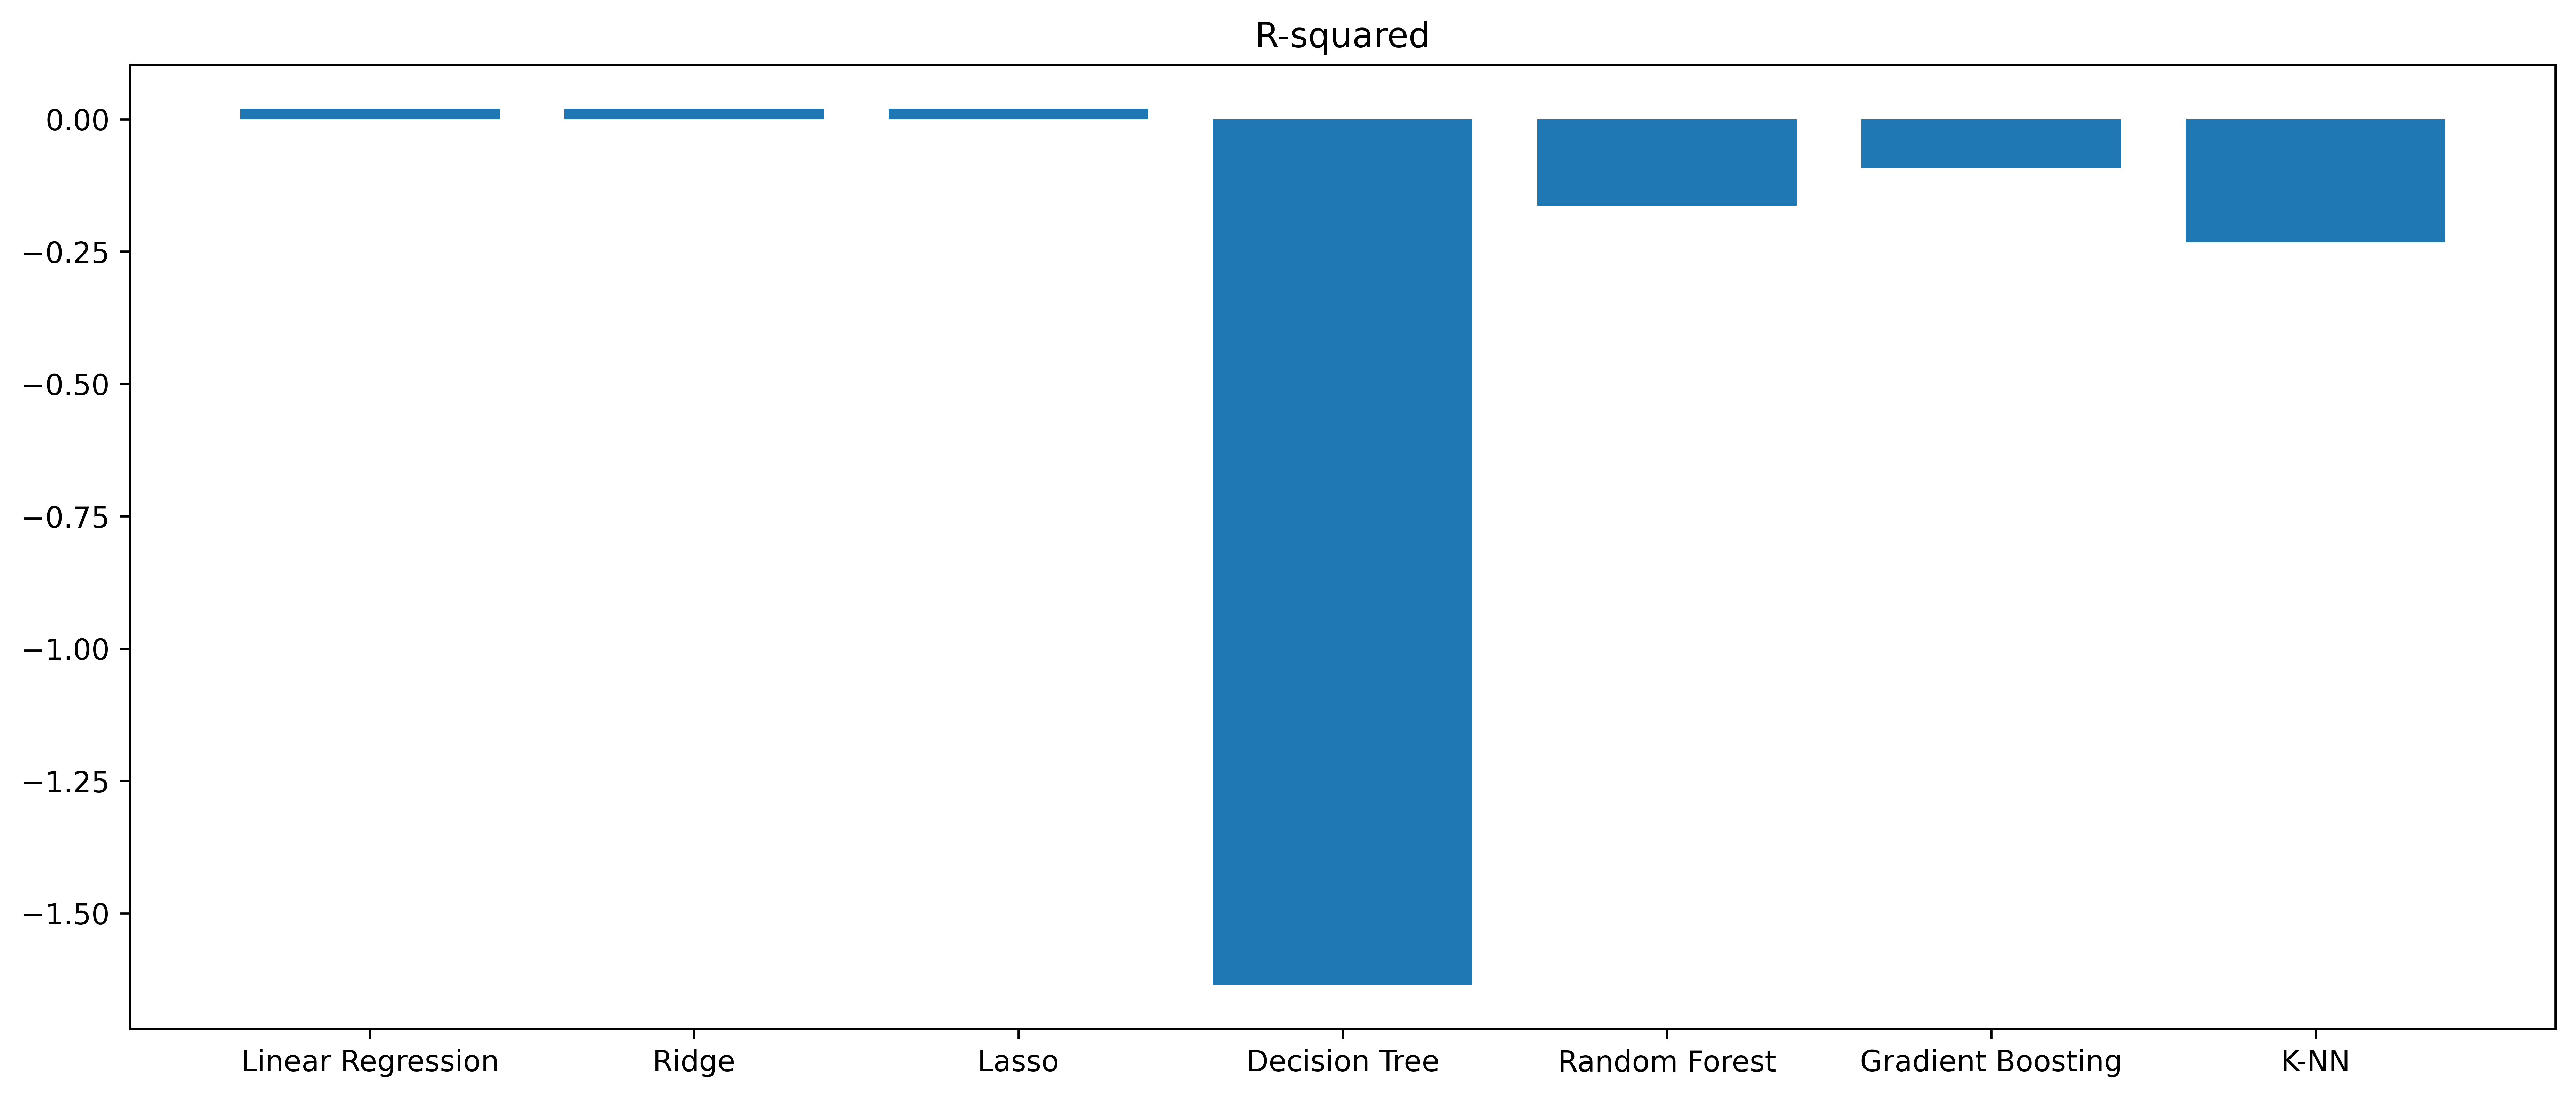

In [7]:
# compare the models using matplotlib
fig1, ax1 = plt.subplots(figsize=(15, 6), dpi=600)
ax1.bar(model_names, model_mse)
ax1.set_title('Mean Squared Error')
plt.show()

fig2, ax2 = plt.subplots(figsize=(15, 6), dpi=600)
ax2.bar(model_names, model_mae)
ax2.set_title('Mean Absolute Error')
plt.show()

fig3, ax3 = plt.subplots(figsize=(15, 6), dpi=600)
ax3.bar(model_names, model_r2)
ax3.set_title('R-squared')
plt.show()